## 분류

In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)
# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os
# 깔끔한 그래프 출력을 위해 %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

# 이미지를 저장할 디렉토리 생성
os.makedirs(IMAGES_PATH, exist_ok=True)

# 이미지를 저장할 함수
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 한글 폰트 설정
from matplotlib import font_manager, rc
import platform
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

# 음수 출력
mpl.rcParams['axes.unicode_minus'] = False
# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3

# 그래픽 출력을 위한 라이브러리
import seaborn as sns

# 과학 기술 통계 라이브러리
import scipy as sp
from scipy import stats

# 사이킷런 ≥0.20 필수 - 0.20에서 데이터 변환을 위한 Transformer 클래스가 추가됨
import sklearn
assert sklearn.__version__ >= "0.20"

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)


## MNIST data

In [9]:
# Data 다운로드
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1, as_frame = False)
print(mnist.keys())

c:\Users\USER\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [10]:
# 피처와 타겟 가져오기
X, y = mnist['data'], mnist['target']
print(X.shape, y.shape)
# 데이터는 784 픽셀을 가진 흑맥 이미지로 실제 크기는 28 * 28
# 각 픽셀은 0 ~ 255 까지의 값을 가짐

(70000, 784) (70000,)


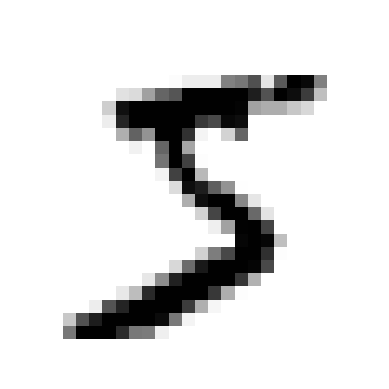

In [17]:
# 하나의 이미지 출력
some_digit = X[0] # 이 이미지는 784 픽셀로 구성
some_digit_image = some_digit.reshape(28, 28) # 2차원 이미지로 변환
plt.imshow(some_digit_image, cmap = mpl.cm.binary)
plt.axis('off')
plt.show()

In [18]:
# 출력한 이미지의 레이블을 확인
print(y[0])

5


In [25]:
# 여러 개의 이미지를 출력하기 위한 함수
# 첫 번째 매개변수는 이미지들
# 두 번째 매개변수는 하나의 행에 출력할 이미지의 수 : 기본값은 10
# 세 번째 매개변수는 옵션으로 딕셔너리를 설정
# 여러 개의 옵션을 설정해야 하는 경우
# 각 매개변수를 나열하는 것은 함수의 가독성을 떨어뜨림
# 이런 경우 매개변수를 하나로 묶어야 하는데 dict 나 class 를 사용
# 생략이 가능한 옵션을 많이 가지고 있으면 dict, 그렇지 않으면 class
def plot_digits(instances, images_per_row=10, **options):
    #이미지 크기 설정
    size = 28
    #열의 개수 설정
    images_per_row = min(len(instances), images_per_row)
    #이미지 전체를 순회하면서 28 * 28로 설정
    images = [instance.reshape(size,size) for instance in instances]
    #행의 개수 구하기
    n_rows = (len(instances) - 1) // images_per_row + 1
    #이미지 들을 저장할 리스트
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    #0으로 가득채운 행렬을 만들어서 images 에 저장
    images.append(np.zeros((size, size * n_empty)))

    #행 단위로 순회하면서 이미지를 추가
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    #이미지 출력
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

그림 저장: more_digits_plot


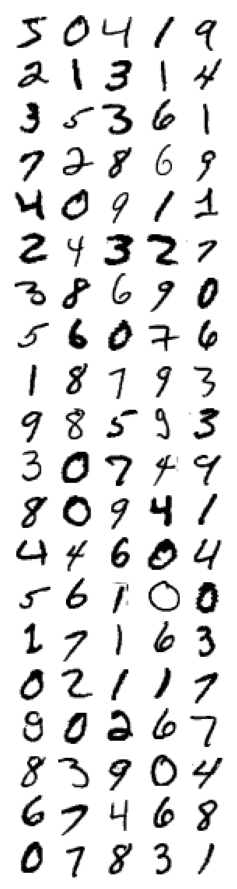

In [26]:
# 여러 개의 이미지 출력 함수 확인
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=5)
save_fig("more_digits_plot")
plt.show()


In [30]:
# 타겟의 자료형 확인 : str
print(type(y[0]))
# 범주형 데이터의 자료형은 정수를 권장
# 타겟의 자료형 변경
# 간혹 np.int 로 변경하는 경우가 있는데 numpy 버전이 바뀌면서 없어짐
y = y.astype(np.uint8)
print(type(y[0]))

<class 'str'>
<class 'numpy.uint8'>


## 이진 분류를 위한 데이터 생성

In [31]:
# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# 이진 분류는 True 와 False로 분류
# 이진 분류의 경우는 Target 이 bool
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

print(y_train_5[0])
print(y_test_5[0])

True
False


## SGDClassifier 을 사용한 이진 분류

### 훈련 및 데이터 예측

In [32]:
from sklearn.linear_model import SGDClassifier

# 훈련에 사용할 모델을 생성 - 하이퍼 파라미터를 설정
# max_iter : 최대 반복 횟수
# tol : 정밀도
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
# 훈련
sgd_clf.fit(X_train, y_train_5)

# 예측
sgd_clf.predict([some_digit])

array([ True])

### kfold cross-validation 을 이용한 정확도 측정

In [33]:
from sklearn.model_selection import cross_val_score
# 3번 교차 검증을 수행하는데 평가 지표는 정확도
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95, 0.96, 0.96])

In [34]:
# 새로운 분류기를 가지고 훈련하고 교차 검증
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

# 분류기 생성
never_5_clf = Never5Classifier()
# 새로 만든 분류기의 정확도 확인
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.911, 0.909, 0.909])

## 분류의 평가 지표

In [36]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# 확률적 경사 하강법 모델을 가지고 훈련한 후 값을 예측
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

# 오차 행렬 출력
# 수식을 표현할 때는 TP, FP, FN, TN 으로 표현을 함
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [37]:
# 다른 평가 지표 계산
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("accuracy: %.2f" %accuracy_score(y_train_5, y_train_pred))
print("Precision : %.3f" % precision_score(y_train_5, y_train_pred))
print("Recall : %.3f" % recall_score(y_train_5, y_train_pred))
print("F1 : %.3f" % f1_score(y_train_5, y_train_pred))

accuracy: 0.96
Precision : 0.837
Recall : 0.651
F1 : 0.733


In [40]:
# 결정 입계값 출력

# 자신의 점수 출력
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)

# 전체 훈련 데이터의 점수를 출력
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
print(y_scores)


[2164.22]
[  1200.931 -26883.792 -33072.035 ...  13272.127  -7258.472 -16877.508]


그림 저장: precision_recall_vs_threshold_plot


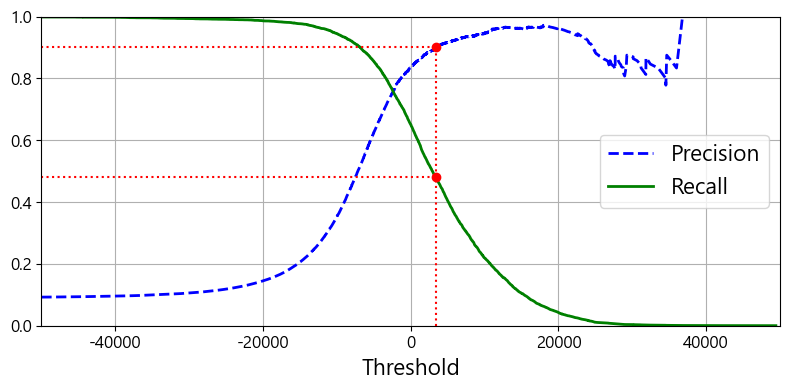

In [48]:
# 정밀도와 재현율 트레이드 오프
from sklearn.metrics import precision_recall_curve
# 정밀도, 재현율, 임계값을 전부 추출
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

# 정밀도와 재현율 그래프를 그려주는 함수
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)

    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16) # Not shown
    plt.grid(True) # Not shown
    plt.axis([-50000, 50000, 0, 1]) # Not shown

plt.figure(figsize=(8, 4)) 
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

# 정밀도와 재현율이 0.9가 되는 위치를 조회
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")
plt.plot([threshold_90_precision], [recall_90_precision], "ro")
save_fig("precision_recall_vs_threshold_plot")
plt.show()

In [49]:
# 정밀도가 0.9 가 되는 지점을 이용해서 예측
y_train_pred_90 = (y_scores >= threshold_90_precision)
#정밀도
print(precision_score(y_train_5, y_train_pred_90))
#재현율
print(recall_score(y_train_5, y_train_pred_90))ㅁ

0.9000345901072293
0.4799852425751706


### ROC 곡선

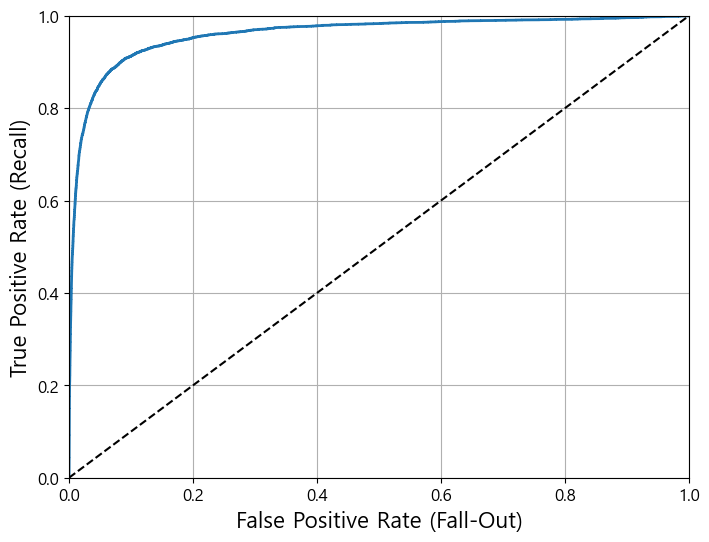

In [55]:
from sklearn.metrics import roc_curve

# 그래프에 사용할 값 계산
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # 대각선 -- 완전 랜덤인 경우
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True) 

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

# 점선이 완전 랜덤 분류기
# 점선으로부터 멀어질수록 좋은 분류기

In [57]:
# ROC 곡선의 면적
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_5, y_scores))

0.9604938554008616


## 다중 분류

### 이진 분류기를 이용한 다중 분류

In [61]:
from sklearn.svm import SVC

# 이진 분류기
svm_clf = SVC(gamma="auto", random_state=42)

# 이진 분류기를 이용해서 0 - 9 까지 10을 분류
svm_clf.fit(X_train[:1000], y_train[:1000]) # y_train_5이 아니라 y_train입니다
print(svm_clf.predict([some_digit]))

# 결정 점수를 확인
some_digit_scores = svm_clf.decision_function([some_digit])
print(some_digit_scores)

[5]
[[ 2.816  7.092  3.83   0.794  5.889  9.297  1.799  8.104 -0.228  4.838]]


### SGD 를 이용한 다중 분류

In [62]:
sgd_clf.fit(X_train, y_train)
# 예측
print(sgd_clf.predict([some_digit]))
#결정 점수 확인
print(sgd_clf.decision_function([some_digit]))

[3]
[[-31893.031 -34419.691  -9530.64    1823.732 -22320.148  -1385.805
  -26188.911 -16147.513  -4604.355 -12050.767]]


In [63]:
# 교차 검증을 이용한 정확도 확인
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.874, 0.858, 0.869])

In [64]:
# 특성이 여러 개이고 이 특성의 값의 분포가 일정하지 않은 경우
# scaling 이나 standardization 을 고려
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.898, 0.891, 0.902])

In [65]:
# 오차 행렬 출력
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

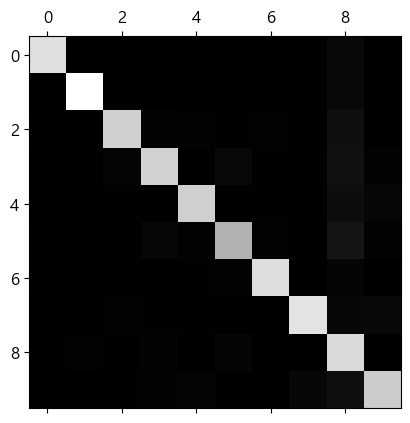

In [69]:
# 오차 행렬을 시각화
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

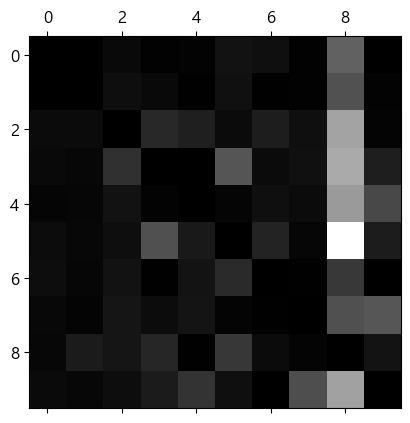

In [67]:
# 오차 행렬을 각 행의 합계로 나누고 대각선을 0으로 채워서 오류를 조금 더 눈에 띄게 출력
# 분류 모델에서는 이 행렬을 반드시 출력해보는 것이 좋음
# 잘못 분류된 모델을 확인해 볼 수 있음
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
#주 대각선을 0으로 채움
np.fill_diagonal(norm_conf_mx, 0)
#출력
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

### 다중 레이블 분류

In [72]:
# 출력해야 할 레이블이 여러 개인 경우
# 이미지를 가지고 7보다 큰 지, 홀수 인지 여부를 같이 리턴하는 경우
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)

# 2개를 가지고 MultiLabel 생성
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)
knn_clf.predict([some_digit])


array([[False,  True]])

### LDA(선형 판별 분석)


In [73]:
# borrowscore 와 payment_inc_ratio 에 따른 outcome 선형 판별 분석
loan3000 = pd.read_csv('./data/loan3000.csv')
# print(loan3000)

      Unnamed: 0   outcome            purpose_    dti  borrower_score  \
0          32109  paid off  debt_consolidation  21.23            0.40   
1          16982   default         credit_card  15.49            0.40   
2          25335  paid off  debt_consolidation  27.30            0.70   
3          34580  paid off      major_purchase  21.11            0.40   
4          14424   default  debt_consolidation  16.46            0.45   
...          ...       ...                 ...    ...             ...   
2995       36589  paid off  debt_consolidation  13.30            0.50   
2996       43889  paid off               other   6.09            0.60   
2997        7219   default  debt_consolidation  16.13            0.20   
2998        8987   default  debt_consolidation  18.39            0.45   
2999       11117   default         credit_card  26.67            0.40   

      payment_inc_ratio  
0               5.11135  
1               5.43165  
2               9.23003  
3               2.3

In [74]:
# 타겟을 범주형으로 변환
loan3000.outcome = loan3000.outcome.astype('category')

# 독립 변수와 종속 변수를 설정
predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

X = loan3000[predictors]
y = loan3000[outcome]
print(X)
print()
print(y)

      borrower_score  payment_inc_ratio
0               0.40            5.11135
1               0.40            5.43165
2               0.70            9.23003
3               0.40            2.33482
4               0.45           12.10320
...              ...                ...
2995            0.50           18.36620
2996            0.60            1.80421
2997            0.20           15.42180
2998            0.45            8.92335
2999            0.40           12.88190

[3000 rows x 2 columns]

0       paid off
1        default
2       paid off
3       paid off
4        default
          ...   
2995    paid off
2996    paid off
2997     default
2998     default
2999     default
Name: outcome, Length: 3000, dtype: category
Categories (2, object): ['default', 'paid off']


In [75]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
loan_lda = LinearDiscriminantAnalysis()
loan_lda.fit(X, y)
#최적의 값을 확인
print(pd.DataFrame(loan_lda.scalings_, index=X.columns))

                          0
borrower_score     7.175839
payment_inc_ratio -0.099676


In [77]:
# 처음 5개의 데이터 판별
pred = pd.DataFrame(loan_lda.predict_proba(loan3000[predictors]), columns=loan_lda.classes_)
print(pred.head())

    default  paid off
0  0.553544  0.446456
1  0.558953  0.441047
2  0.272696  0.727304
3  0.506254  0.493746
4  0.609952  0.390048


### loan_200.csv 파일의 데이터를 읽어서 payment_inc_ratio 와 dti 를 이용해서 outcome 을 예측

In [79]:
from sklearn.neighbors import KNeighborsClassifier

loan200 = pd.read_csv('data/loan200.csv')
predictors = ['payment_inc_ratio', 'dti']
outcome = 'outcome'

newloan = loan200.loc[0:0, predictors]
X = loan200.loc[1:, predictors]
y = loan200.loc[1:, outcome]

print(X)
print(y)


     payment_inc_ratio    dti
1              5.46933  21.33
2              6.90294   8.97
3             11.14800   1.83
4              3.72120  10.81
5              1.89923  11.34
..                 ...    ...
196           11.66300  26.09
197            2.97641  16.41
198            1.96846  19.98
199            9.64200  20.17
200            7.03924  13.88

[200 rows x 2 columns]
1       default
2      paid off
3      paid off
4       default
5      paid off
         ...   
196     default
197     default
198     default
199    paid off
200    paid off
Name: outcome, Length: 200, dtype: object


In [81]:
knn = KNeighborsClassifier(n_neighbors=20)
#훈련
knn.fit(X, y)
#예측
print(knn.predict(newloan))
# 확률 확인
print(knn.predict_proba(newloan))


['paid off']
[[0.45 0.55]]


### 표준화를 수행한 경우 와의 차이

In [3]:
loan_data = pd.read_csv('data/loan_data.csv.gz')
loan_data = loan_data.drop(columns=['Unnamed: 0', 'status'])
loan_data['outcome'] = pd.Categorical(loan_data['outcome'],
categories=['paid off', 'default'],
ordered=True)
predictors = ['payment_inc_ratio', 'dti', 'revol_bal', 'revol_util']
outcome = 'outcome'
newloan = loan_data.loc[0:0, predictors]
print(newloan)

   payment_inc_ratio  dti  revol_bal  revol_util
0             2.3932  1.0       1687         9.4


In [6]:
X = loan_data.loc[1:, predictors]
y = loan_data.loc[1:, outcome]

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

nbrs = knn.kneighbors(newloan)
print(X.iloc[nbrs[1][0], :])

X = loan_data.loc[1:, predictors]
y = loan_data.loc[1:, outcome]

       payment_inc_ratio   dti  revol_bal  revol_util
35536            1.47212  1.46       1686        10.0
33651            3.38178  6.37       1688         8.4
25863            2.36303  1.39       1691         3.5
42953            1.28160  7.14       1684         3.9
43599            4.12244  8.98       1684         7.2


In [7]:
#표준화를 하지 않으면 이웃을 찾을 때 특정 특성이 영향을 많이 미치게 됩니다.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

#상대적으로 revol_bal이 가까운 데이터가 선택되게 됩니다.
nbrs = knn.kneighbors(newloan)
print(X.iloc[nbrs[1][0], :])

#정규화를 수행한 후 이웃 구하기
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X * 1.0)

X_std = scaler.transform(X * 1.0)
newloan_std = scaler.transform(newloan * 1.0)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_std, y)

#이전에 비해서 revol_bal 을 제외한 속성의 거리들이 가까워 짐
nbrs = knn.kneighbors(newloan_std)
print(X.iloc[nbrs[1][0], :])

       payment_inc_ratio   dti  revol_bal  revol_util
35536            1.47212  1.46       1686        10.0
33651            3.38178  6.37       1688         8.4
25863            2.36303  1.39       1691         3.5
42953            1.28160  7.14       1684         3.9
43599            4.12244  8.98       1684         7.2
       payment_inc_ratio   dti  revol_bal  revol_util
2080             2.61091  1.03       1218         9.7
1438             2.34343  0.51        278         9.9
30215            2.71200  1.34       1075         8.5
28542            2.39760  0.74       2917         7.4
44737            2.34309  1.37        488         7.2


In [2]:
#데이터 가져오기
from sklearn import datasets
iris = datasets.load_iris()
#list(iris.keys())

In [3]:
#피처 생성
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.uint8)
print(X)
print(y)

[[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.4]
 [0.3]
 [0.2]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.1]
 [0.1]
 [0.2]
 [0.4]
 [0.4]
 [0.3]
 [0.3]
 [0.3]
 [0.2]
 [0.4]
 [0.2]
 [0.5]
 [0.2]
 [0.2]
 [0.4]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.4]
 [0.1]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.3]
 [0.3]
 [0.2]
 [0.6]
 [0.4]
 [0.3]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [1.4]
 [1.5]
 [1.5]
 [1.3]
 [1.5]
 [1.3]
 [1.6]
 [1. ]
 [1.3]
 [1.4]
 [1. ]
 [1.5]
 [1. ]
 [1.4]
 [1.3]
 [1.4]
 [1.5]
 [1. ]
 [1.5]
 [1.1]
 [1.8]
 [1.3]
 [1.5]
 [1.2]
 [1.3]
 [1.4]
 [1.4]
 [1.7]
 [1.5]
 [1. ]
 [1.1]
 [1. ]
 [1.2]
 [1.6]
 [1.5]
 [1.6]
 [1.5]
 [1.3]
 [1.3]
 [1.3]
 [1.2]
 [1.4]
 [1.2]
 [1. ]
 [1.3]
 [1.2]
 [1.3]
 [1.3]
 [1.1]
 [1.3]
 [2.5]
 [1.9]
 [2.1]
 [1.8]
 [2.2]
 [2.1]
 [1.7]
 [1.8]
 [1.8]
 [2.5]
 [2. ]
 [1.9]
 [2.1]
 [2. ]
 [2.4]
 [2.3]
 [1.8]
 [2.2]
 [2.3]
 [1.5]
 [2.3]
 [2. ]
 [2. ]
 [1.8]
 [2.1]
 [1.8]
 [1.8]
 [1.8]
 [2.1]
 [1.6]
 [1.9]
 [2. ]
 [2.2]
 [1.5]
 [1.4]
 [2.3]
 [2.4]
 [1.8]
 [1.8]
 [2.1]
 [2.4]
 [2.3]
 [1.9]

In [4]:
from sklearn.linear_model import LogisticRegression

#분류 모델 생성
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
#모델 훈련
log_reg.fit(X, y)

#샘플 데이터를 1000개를 생성해서 예측
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
#각 샘플의 확률을 계산
y_proba = log_reg.predict_proba(X_new)
#경계 점수 - 이 값보다 크면 virginica 그렇지 않으면 virginica 가 아님
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
print(decision_boundary)

#예측
print(log_reg.predict([[1.7], [1.5]]))

[1.661]
[1 0]


## Logistic Reg 을 이용한 다중 클래스 분류(카테고리 분류)

In [5]:
X = iris["data"][:, (2, 3)] # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

In [6]:
#분류기 훈련
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10,
random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [7]:
# 샘플 데이터 생성
# linspace 는 범위 안에 일정한 간격을 갖는 숫자 배열 생성
# linspace(0,1,4) : [0,0.25, 0.5, 0.75, 1.0]
# reshape 는 shpae 을 변겅 -1 을 설정하면 나머지 전체
# meshgrid 는 격자 좌표 생성
# x0 은 500행, 500열의 격자

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                    np.linspace(0, 3.5, 200).reshape(-1, 1),)
                    
# 예측에 사용할 샘플 데이터
X_new = np.c_[x0.ravel(), x1.ravel()]

# 샘플 데이터를 가지고 예측
y_predict = softmax_reg.predict(X_new)
print(y_predict)
y_proba = softmax_reg.predict_proba(X_new)
print(y_proba)

[0 0 0 ... 2 2 2]
[[1.000e+00 3.761e-06 6.800e-20]
 [1.000e+00 4.059e-06 7.857e-20]
 [1.000e+00 4.380e-06 9.079e-20]
 ...
 [7.738e-23 1.037e-11 1.000e+00]
 [6.697e-23 9.684e-12 1.000e+00]
 [5.796e-23 9.044e-12 1.000e+00]]


## Support Vector Machine

### 선형 SVM을 이용한 이진 분류 

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # 꽃잎 길이, 꽃잎 너비
# 이진 분류를 수행하기 위해서 타겟 수정
y = (iris["target"] == 2).astype(np.float64)

# 스케일링과 훈련을 실시할 모델을 Pipeline 으로 구성
# 머신러닝과 데이터 처리 등을 할 때 Pipeline 을 구성하는 것은 매우 중요
# Pipeline 을 구성하지 않고 순차적으로 하나씩 해도 되지만 이런 경우 코드의 가독성이 떨어짐
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
])
# 훈련
svm_clf.fit(X, y)

# 예측 - 1이면 맞음, 0이면 아님
svm_clf.predict([[5.5, 1.7]])


array([1.])

### 비선형 SVM

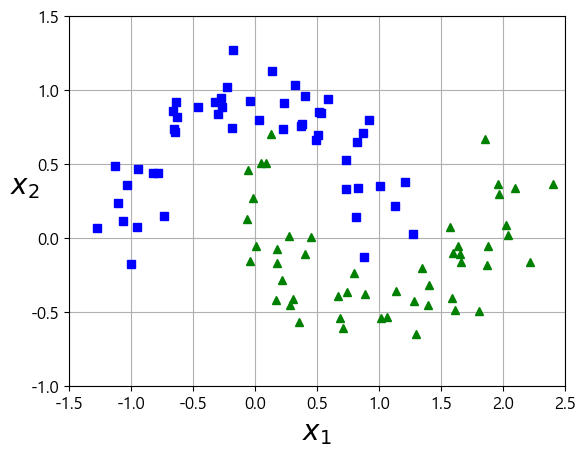

In [14]:
# 비선형을 설명하기 위한 데이터 생성
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

c:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


그림 저장: moons_polynomial_svc_plot


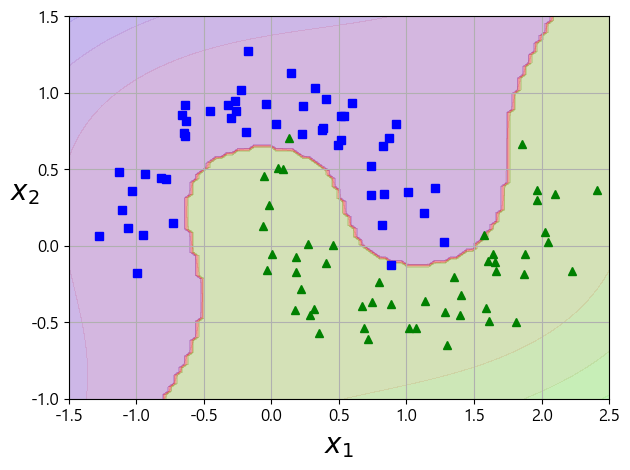

In [27]:
# 비선형 SVM 을 이용해서 위 데이터를 훈련
from sklearn.preprocessing import PolynomialFeatures
# degree 값을 높이면 차수가 높아져서 곡선이 복잡해짐
# 훈련 데이터에 대해서는 잘 구분하지만
# 너무 높게 설정하면 새로운 데이터에는 잘 구분 하지 못함(Overfitting)

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
])
polynomial_svm_clf.fit(X, y)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
save_fig("moons_polynomial_svc_plot")
plt.show()

### 가우시안 RBF 커널을 이용한 비선형 SVM

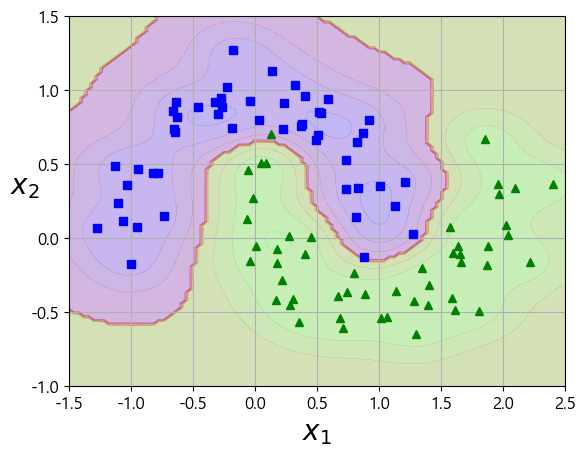

In [28]:
from sklearn.svm import SVC

rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, random_state= 42))
])
rbf_kernel_svm_clf.fit(X, y)

plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

# 하이퍼 파라미터 감마를 사용하는데 이 값을 증가시키면 종 모양 그래프가 좁아져서
# 각 샘플의 영향 범위가 작아져서 결정 경계가 더 불규칙해지며
# 작은 감마 값은 넒은 종 모양 그래프를 만들어 냄

## Decision Tree

### 분류 모델 생성 및 훈련과 시각화

In [29]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

X = iris.data[:, 2:] # 꽃잎 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [30]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)


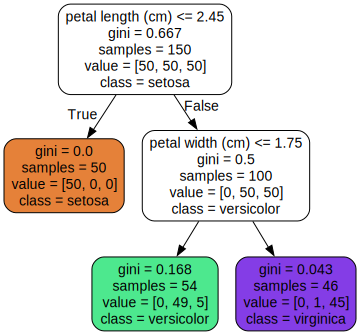

In [34]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

with open('iris_tree.dot') as f:
    dot_graph = f.read()
src = graphviz.Source(dot_graph)
src


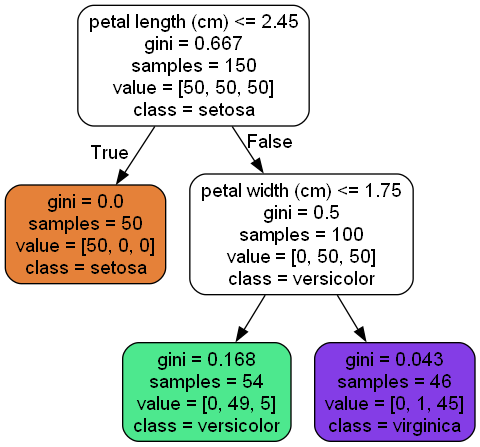

In [40]:
import pygraphviz as pga
from IPython.display import Image
graph = pga.AGraph('./iris_tree.dot')
graph.draw("./images/classification/iris_tree.png", prog='dot')
Image("iris_tree.png")

In [42]:
# 예측
y_pred = tree_clf.predict([[5, 1.5]])
# 예측 확률
y_proba = tree_clf.predict_proba([[5, 1.5]])

print(y_pred)
print(y_proba)

[1]
[[0.    0.907 0.093]]


In [43]:
print(tree_clf.feature_importances_)

# 피처의 중요도를 확인해서 중요하지 않은 피처를 제거하고 모델을 만들기도 하고
# 중요하지 않은 피처들을 모아서 하나의 피처로 만들어서 모델의 정확도를 높이기도 함

[0.562 0.438]


### 타이타닉 데이터를 이용한 생존 여부 분류 - 결정 트리 모델 활용

In [88]:
import pandas as pd
import seaborn as sns
# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

In [89]:
# 결측치 처리
# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)
# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0) 
# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
rdf['embarked'].fillna(most_freq, inplace=True)

In [90]:
# 분석에 활용할 열(속성)을 선택
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  714 non-null    int64  
 1   pclass    714 non-null    int64  
 2   sex       714 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     714 non-null    int64  
 5   parch     714 non-null    int64  
 6   embarked  714 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 44.6+ KB


In [91]:
# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
# print(onehot_sex)

# 기존 데이터프레임에 원 핫 인코딩한 결과 추가
ndf = pd.concat([ndf, onehot_sex], axis=1)
print(ndf.head())


   survived  pclass     sex   age  sibsp  parch embarked  female  male
0         0       3    male  22.0      1      0        S       0     1
1         1       1  female  38.0      1      0        C       1     0
2         1       3  female  26.0      0      0        S       1     0
3         1       1  female  35.0      1      0        S       1     0
4         0       3    male  35.0      0      0        S       0     1


In [92]:
# 순서가 없으므로 원 핫 인코딩 - 앞에 town 을 붙여서 컬럼 생성
onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')

# 기존 데이터프레임에 원 핫 인코딩 한 결과 추가
ndf = pd.concat([ndf, onehot_embarked], axis=1)
print(ndf.head())

   survived  pclass     sex   age  sibsp  parch embarked  female  male  \
0         0       3    male  22.0      1      0        S       0     1   
1         1       1  female  38.0      1      0        C       1     0   
2         1       3  female  26.0      0      0        S       1     0   
3         1       1  female  35.0      1      0        S       1     0   
4         0       3    male  35.0      0      0        S       0     1   

   town_C  town_Q  town_S  
0       0       0       1  
1       1       0       0  
2       0       0       1  
3       0       0       1  
4       0       0       1  


In [93]:
# 원 핫 인코딩 한 컬럼 제거
ndf.drop(['sex', 'embarked'], axis=1, inplace=True)
print(ndf.head())

   survived  pclass   age  sibsp  parch  female  male  town_C  town_Q  town_S
0         0       3  22.0      1      0       0     1       0       0       1
1         1       1  38.0      1      0       1     0       1       0       0
2         1       3  26.0      0      0       1     0       0       0       1
3         1       1  35.0      1      0       1     0       0       0       1
4         0       3  35.0      0      0       0     1       0       0       1


In [113]:
# 피처와 타겟 생성 독립 변수 X, 종속 변수 Y
X=ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male','town_C', 'town_Q', 'town_S']]
y=ndf['survived'] 

In [114]:
# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
print(X)

[[ 0.911 -0.53   0.525 ... -0.472 -0.202  0.533]
 [-1.476  0.572  0.525 ...  2.12  -0.202 -1.876]
 [ 0.911 -0.255 -0.552 ... -0.472 -0.202  0.533]
 ...
 [-1.476 -0.737 -0.552 ... -0.472 -0.202  0.533]
 [-1.476 -0.255 -0.552 ...  2.12  -0.202 -1.876]
 [ 0.911  0.159 -0.552 ... -0.472  4.95  -1.876]]


In [115]:
# 훈련 데이터와 테스트 데이터를 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)

(499, 9)
(215, 9)


In [116]:
# 모델을 선택해서 훈련
from sklearn import tree
# 불순도 지표는 엔트로피를 사용하고 중간 가지의 최대 개수는 5
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [117]:
# 예측
y_hat = tree_model.predict(X_test)

In [118]:
# 예측된 결과 확인
print(y_hat[0:10])
print(y_test.values[0:10])

[0 1 1 1 0 0 0 1 0 1]
[0 1 1 1 0 1 1 1 0 0]


In [119]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
tree_matrix = metrics.confusion_matrix(y_test, y_hat)
print(tree_matrix)

# 모형 성능 평가 - 평가지표 계산
tree_report = metrics.classification_report(y_test, y_hat)
print(tree_report)

[[103  23]
 [ 29  60]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       126
           1       0.72      0.67      0.70        89

    accuracy                           0.76       215
   macro avg       0.75      0.75      0.75       215
weighted avg       0.76      0.76      0.76       215



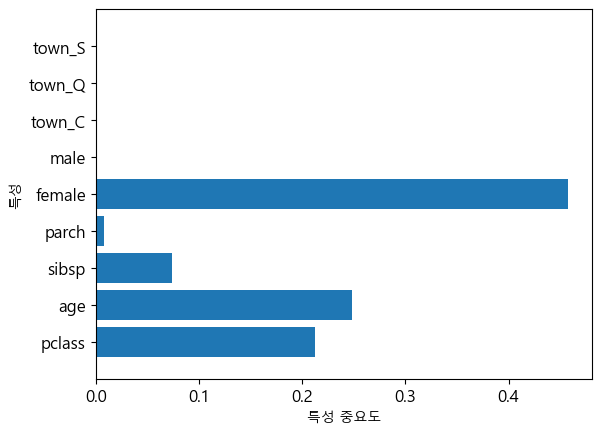

In [120]:
# 피처의 중요도 출력
n_features = X.data.shape[1]
plt.barh(np.arange(n_features), tree_model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), 
        ['pclass', 'age', 'sibsp', 'parch', 'female', 'male',
        'town_C', 'town_Q', 'town_S'])
plt.xlabel("특성 중요도")
plt.ylabel("특성")
plt.ylim(-1, n_features)
plt.show()

In [124]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}
grid_cv = GridSearchCV(tree_model, param_grid=params, scoring='accuracy', cv=5,
verbose=1 )
grid_cv.fit(X_train, y_train)
print('best Accuracy :', grid_cv.best_score_)
print('best params :', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
best Accuracy : 0.8096969696969698
best params : {'max_depth': 6}
